# **Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv"

df = pd.read_csv(dataset)
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
df.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [ ]:
int_list = ['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'Age',
       'Diabetic']

flt_list = ['BMI', 'DiabetesPedigree']

for col in int_list:
  df[col] = df[col].astype('int32') #notebook does not support int16

for col in flt_list:
  df[col] = df[col].astype('float32') #notebook does not support float16

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int32  
 1   Pregnancies             15000 non-null  int32  
 2   PlasmaGlucose           15000 non-null  int32  
 3   DiastolicBloodPressure  15000 non-null  int32  
 4   TricepsThickness        15000 non-null  int32  
 5   SerumInsulin            15000 non-null  int32  
 6   BMI                     15000 non-null  float32
 7   DiabetesPedigree        15000 non-null  float32
 8   Age                     15000 non-null  int32  
 9   Diabetic                15000 non-null  int32  
dtypes: float32(2), int32(8)
memory usage: 586.1 KB


In [ ]:
['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic']

1447

In [ ]:
df.value_counts('Diabetic')

Diabetic
0    10000
1     5000
Name: count, dtype: int64

This Data is unbalance, there is a need to balance it while training the model to avoid

In [ ]:
df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

No missing Data

In [ ]:
#Validating data

df[df['Diabetic'].isin([1, 0]) == False]


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic


In [ ]:
for cols in df.columns:
  min = df[cols].min()
  max = df[cols].max()
  print(f'{cols}, \n \t {min},  \n \t {max}')

PatientID, 
 	 -32767,  
 	 32765
Pregnancies, 
 	 0,  
 	 14
PlasmaGlucose, 
 	 44,  
 	 192
DiastolicBloodPressure, 
 	 24,  
 	 117
TricepsThickness, 
 	 7,  
 	 93
SerumInsulin, 
 	 14,  
 	 799
BMI, 
 	 18.203125,  
 	 56.03125
DiabetesPedigree, 
 	 0.07806396484375,  
 	 2.30078125
Age, 
 	 21,  
 	 77
Diabetic, 
 	 0,  
 	 1


In [ ]:
df.groupby('Age')['Diabetic'].count()

Age
21    2556
22    2486
23    1990
24     966
25     991
26    1001
28      29
29      50
30     211
31     196
32     226
33     197
34     236
35     232
36      67
37      74
38     119
39     101
40     106
41     102
42     134
43     266
44     272
45     315
46     270
47     259
48      47
49      55
50      58
51      50
52      63
53     144
54     112
55     128
56     122
57     106
58      71
59      75
60      80
61      78
62      63
63       9
64      11
65      18
66      40
67      49
68      27
69      39
70      29
71      42
72       4
73       7
74       5
75       7
76       5
77       4
Name: Diabetic, dtype: int64

In [40]:
df.Age.nunique()

56

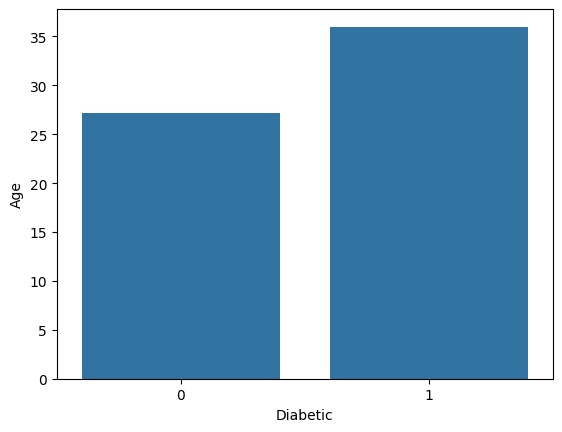

In [47]:
sns.barplot(data=df, y='Age', x='Diabetic', errorbar=None)

plt.show()

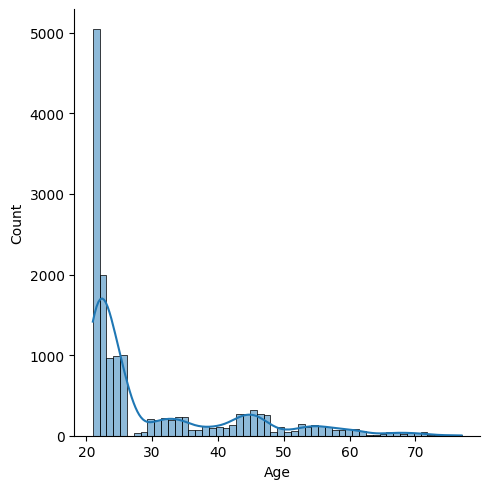

In [48]:
sns.displot(df['Age'], kde=True)

plt.show()

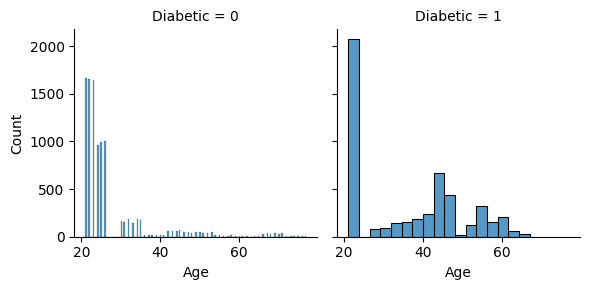

In [54]:
g = sns.FacetGrid(df, col="Diabetic")
g.map(sns.histplot, "Age")

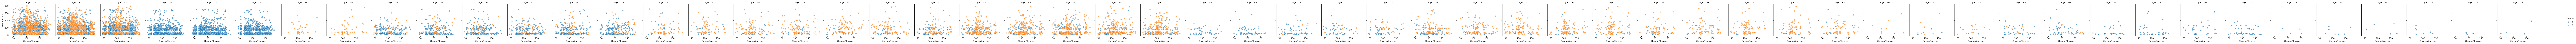

In [53]:
h = sns.FacetGrid(df, col="Age", hue='Diabetic')
h.map(sns.scatterplot, 'PlasmaGlucose', "SerumInsulin", alpha=0.7)
h.add_legend()